In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
import pandas as pd

In [8]:
# Define the category and stock market sector lists
category = ['GLOBAL', 'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS',
              'ENVIRONMENT', 'CRIME', 'SCIENCE', 'BUSINESS', 'GLAMOUR',
              'CONSUMABLES', 'MEDIA', 'LIFESTYLE', 'TRAVEL', 'MONEY']    # 15 category of news

stock_market_sector = ['Financial', 'Technology', 'Healthcare', 'Energy', 'Goods',
                       'Industrials', 'Telecommunication', 'Utilities', 'Housing',
                       'Materials', 'Services']                          # 11 sectors of stock market

In [9]:
# Load pre-trained word embeddings
word_vectors = api.load("glove-wiki-gigaword-300")

# Calculate similarity scores between categories and stock market sectors
similarity_matrix = np.zeros((len(category), len(stock_market_sector)))
for i, cat in enumerate(category):
    cat_lower = cat.lower()  # Convert to lowercase
    for j, sector in enumerate(stock_market_sector):
        sector_lower = sector.lower()  # Convert to lowercase

        #It computes the cosine similarity between their word embeddings vectors and stores the result in the similarity matrix.
        if word_vectors.has_index_for(cat_lower) and word_vectors.has_index_for(sector_lower): 
            similarity_matrix[i, j] = word_vectors.similarity(cat_lower, sector_lower)
        else:
            print(f"One or both of the words '{cat_lower}' and '{sector_lower}' are not in the vocabulary.")

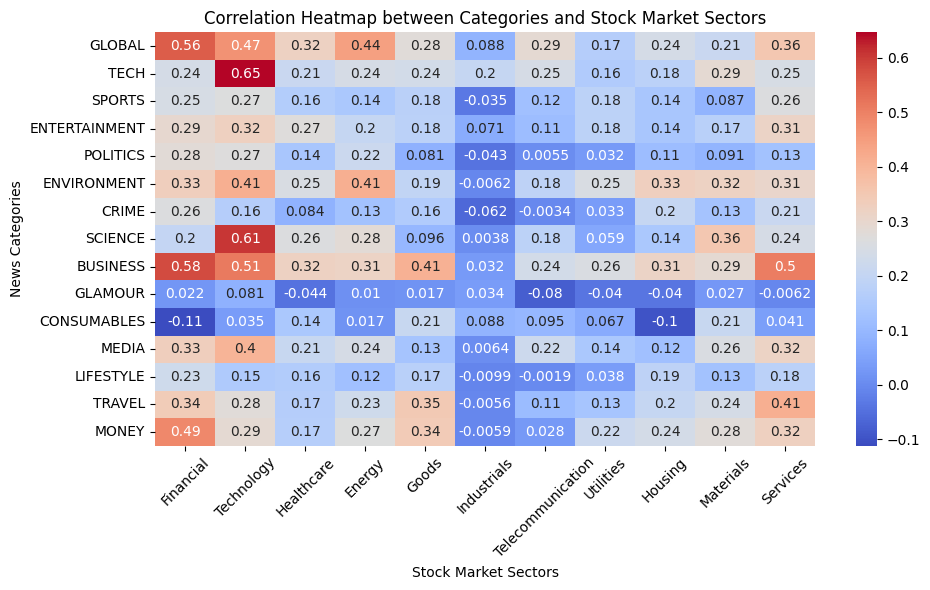

In [10]:
# Creating heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(similarity_matrix, annot=True, xticklabels=stock_market_sector, yticklabels=category, cmap='coolwarm')
plt.title('Correlation Heatmap between Categories and Stock Market Sectors')
plt.xlabel('Stock Market Sectors')
plt.ylabel('News Categories')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [11]:
df_corr = pd.DataFrame(similarity_matrix, index=category, columns=stock_market_sector)
df_corr

,Financial,Technology,Healthcare,Energy,Goods,Industrials,Telecommunication,Utilities,Housing,Materials,Services
GLOBAL,0.556262,0.471298,0.321607,0.442350,0.277357,0.088483,0.288500,0.165269,0.241510,0.213168,0.355875
TECH,0.242386,0.646456,0.211720,0.244999,0.235420,0.203843,0.246383,0.157450,0.179294,0.290506,0.246874
SPORTS,0.247516,0.265751,0.160846,0.143096,0.177717,-0.035063,0.120852,0.181334,0.137295,0.086629,0.261364
ENTERTAINMENT,0.294437,0.324226,0.271564,0.203356,0.179933,0.071282,0.111270,0.181909,0.137450,0.173131,0.313253
POLITICS,0.280176,0.267151,0.139289,0.219497,0.081301,-0.043438,0.005455,0.032017,0.111242,0.090786,0.126490
ENVIRONMENT,0.329549,0.414100,0.253186,0.414791,0.194752,-0.006207,0.184310,0.253870,0.329063,0.317795,0.305592
CRIME,0.262297,0.164024,0.084457,0.127412,0.156061,-0.062135,-0.003409,0.033151,0.202097,0.129954,0.212277
SCIENCE,0.201467,0.605558,0.262105,0.284591,0.095879,0.003840,0.182522,0.058906,0.144391,0.355212,0.244201
BUSINESS,0.579179,0.512937,0.320753,0.314592,0.408734,0.031621,0.235113,0.257977,0.314143,0.288887,0.504475
GLAMOUR,0.022079,0.080638,-0.044467,0.010029,0.016565,0.033712,-0.080381,-0.040045,-0.039512,0.026994,-0.006250


In [12]:
df_corr.to_pickle("Correlation.pkl")